# **1. Data Collection and Preparation**


a. Load Data

In [3]:
import pandas as pd

# Load Netflix dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Display the first few rows of the dataframe
print(netflix_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
print(netflix_data.shape)

(8807, 12)


In [5]:
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


b. Handle Missing Values

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# Fill missing values or drop rows with missing data
netflix_data = netflix_data.dropna(subset=['director', 'cast', 'country', 'rating'])

# Fill missing 'date_added' with a placeholder or the most frequent value
netflix_data['date_added'] = netflix_data['date_added'].fillna('Unknown')

# Check again for missing values
print(netflix_data.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


<ipython-input-8-2425dc864f68>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



c. Normalize Data Formats

In [9]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year from 'date_added'
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Standardize the 'duration' field
netflix_data['duration'] = netflix_data['duration'].str.replace(' Season', ' Seasons')
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', ' Minutes')

print(netflix_data.head())

   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9 

<ipython-input-9-bc16ceff8bf3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-bc16ceff8bf3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-bc16ceff8bf3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-bc16ceff8bf

# **2. Exploratory Data Analysis (EDA)**

Number of Movies vs TV Shows

<ipython-input-13-9cc30a542953>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='type', ylabel='count'>

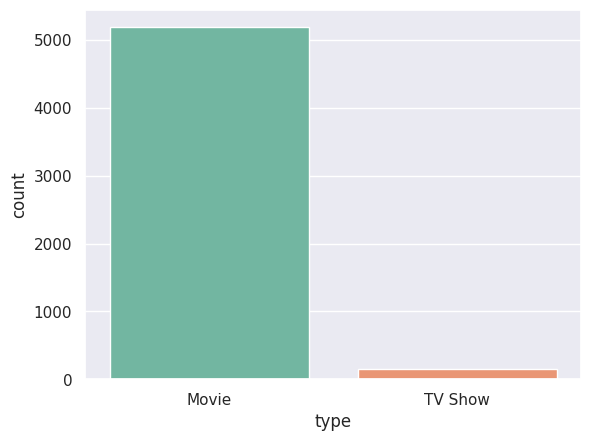

In [13]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="type", data= netflix_data, palette="Set2")

# **Movies & TV Shows Ratings analysis**

In [16]:
#2 different dataframes for movies and TV shows
import matplotlib.pyplot as plt
movie_df = netflix_data[netflix_data['type'] == 'Movie']
tv_df = netflix_data[netflix_data['type'] == 'TV Show']

<ipython-input-17-e3722b1c0ff2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='rating', ylabel='count'>

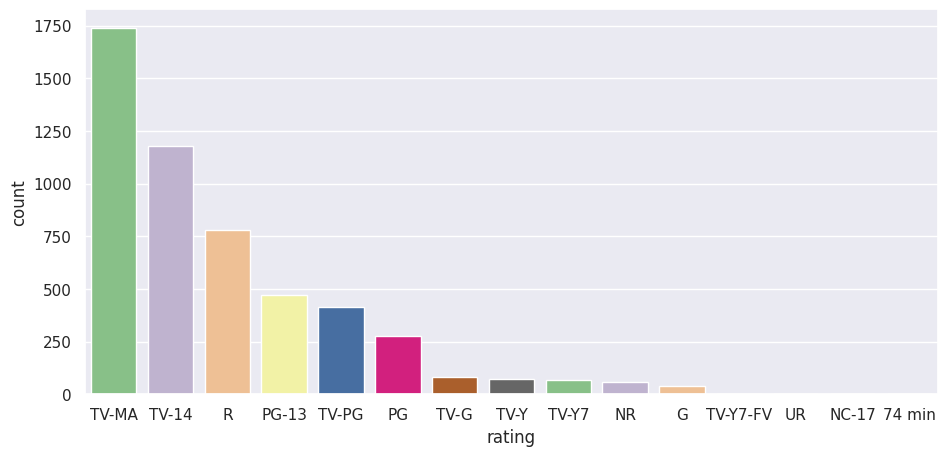

In [17]:
#MOVIES RATINGS
plt.figure(figsize=(11,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movie_df, palette="Accent", order=movie_df['rating'].value_counts().index[0:15])

<ipython-input-23-7262c2766c85>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='rating', ylabel='count'>

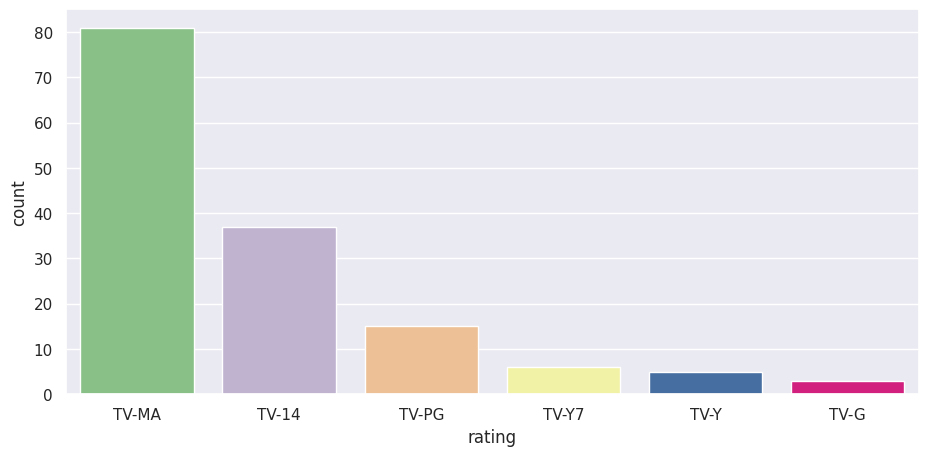

In [23]:
# TV SHOWS RATINGS
plt.figure(figsize=(11,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

# **Yearly Analysis of content**

<Axes: xlabel='count', ylabel='release_year'>

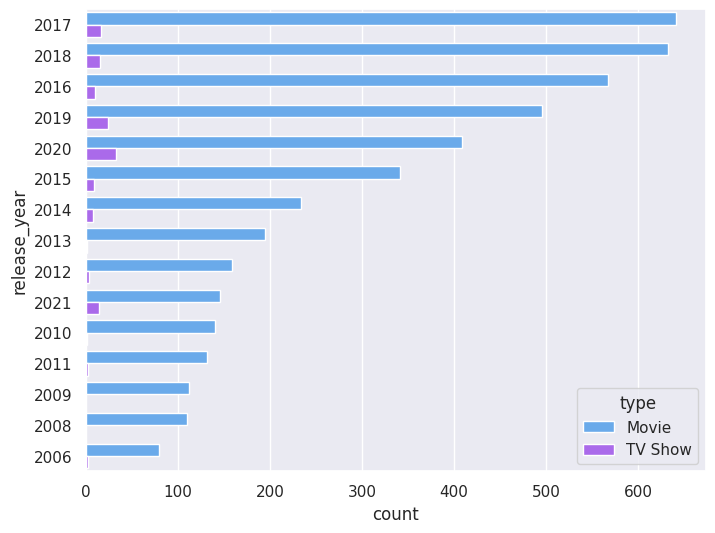

In [24]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= netflix_data, palette="cool", order= netflix_data['release_year'].value_counts().index[0:15],hue=netflix_data['type'])

# **Analysis of movies duration**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Filter the DataFrame for Movies only
movie_df = netflix_data[netflix_data['type'] == 'Movie']

# Step 1: Ensure 'duration' is a string
movie_df['duration'] = movie_df['duration'].astype(str)

# Step 2: Replace ' min' and handle empty strings
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').replace('', np.nan)

# Step 3: Convert the 'duration' column to numeric, using errors='coerce' to handle any non-numeric issues safely
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Step 4: Drop rows where 'duration' is NaN
movie_df.dropna(subset=['duration'], inplace=True)

# Step 5: Display the first few rows of the modified 'duration' column to confirm the changes
print(movie_df['duration'].head())

0      90.0
6      91.0
7     125.0
9     104.0
12    127.0
Name: duration, dtype: float64


<ipython-input-86-c12a44f77ac9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-c12a44f77ac9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-c12a44f77ac9>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-c12a

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


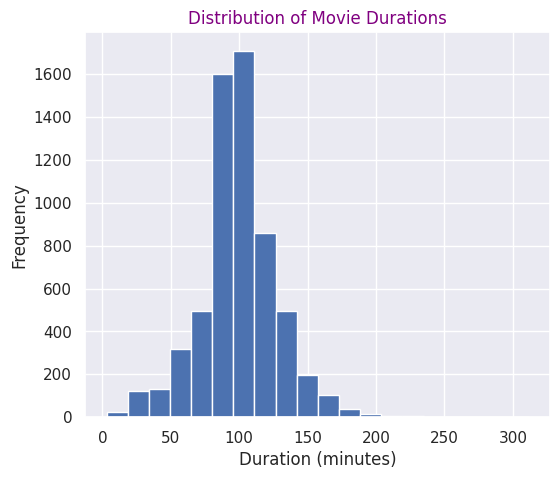

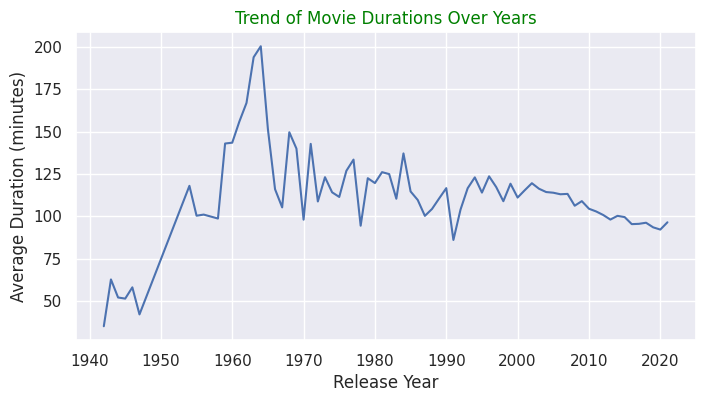

In [88]:
# Summary statistics
print(movie_df['duration'].describe())

# Distribution of movie durations (histogram)
plt.figure(figsize=(6, 5))
movie_df['duration'].hist(bins=20)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations', color = 'purple')
plt.show()

# Comparison of movie durations by genre (optional)
# Splitting 'listed_in' column into multiple rows
movie_genres = movie_df.assign(genres=movie_df['listed_in'].str.split(',')).explode('genres')
# Strip whitespace from genre names
movie_genres['genres'] = movie_genres['genres'].str.strip()

# Line Chart - Trends of Durations Over Years
avg_duration_by_year = movie_df.groupby('release_year')['duration'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_duration_by_year.index, y=avg_duration_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Trend of Movie Durations Over Years', color='green')
plt.show()

<ipython-input-87-0b8201eb155d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='duration', ylabel='Density'>

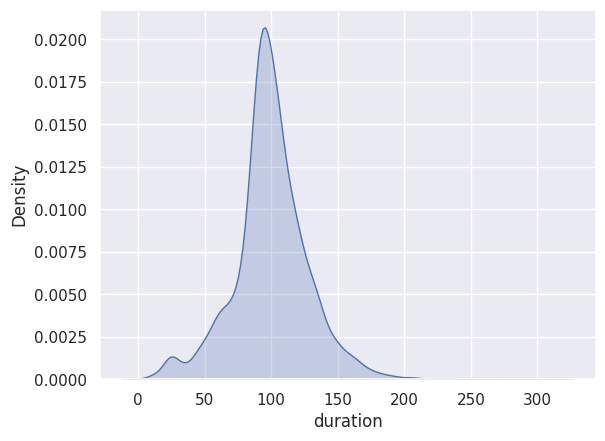

In [87]:
sns.set(style="darkgrid")
sns.kdeplot(data=movie_df['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins.

trends of movies duration

<ipython-input-49-335a1f022f95>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-335a1f022f95>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



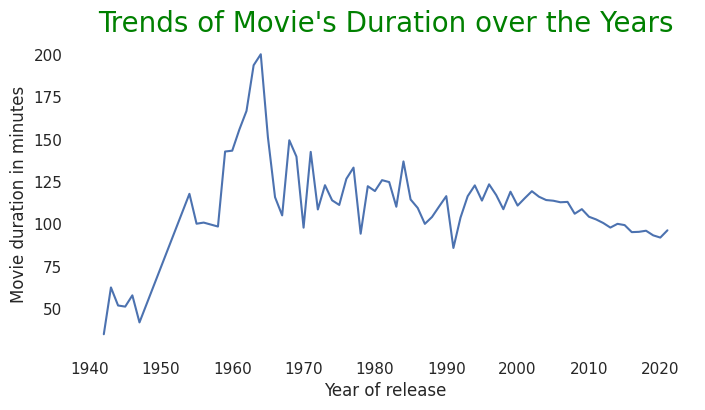

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'duration' is numeric and handle errors
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Drop any NaN values that arise from conversion issues
movie_df.dropna(subset=['duration'], inplace=True)

# Group by 'release_year' and compute the mean duration
duration_year = movie_df.groupby(['release_year'])['duration'].mean()
duration_year.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(8,4))
sns.lineplot(x=duration_year.index, y=duration_year.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of release')
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='green')
plt.show()


# **Analysis of TV Shows with most number of seasons**

In [50]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

8       9
198     1
273     1
276     2
297     1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 147, dtype: int64

In [51]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [52]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
8,The Great British Baking Show,9
3541,Naruto,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
6742,Father Brown,6
1173,Men on a Mission,6
3653,Comedians in Cars Getting Coffee,6


<Axes: xlabel='title'>

<Figure size 1000x600 with 0 Axes>

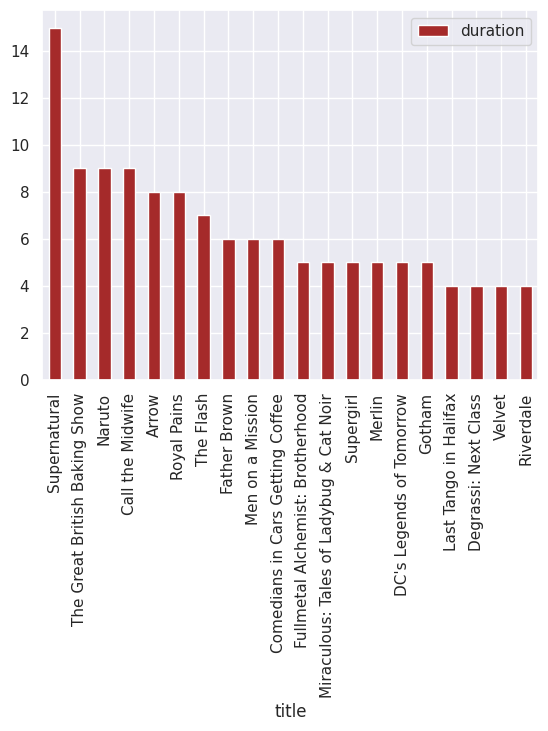

In [53]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='brown')

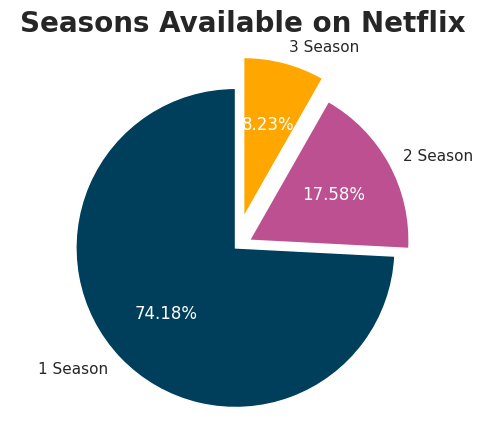

In [54]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(6, 5))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(netflix_data.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90,
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

# **Countries on top for movies content creation**

<ipython-input-55-2ead3d066bae>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='country', ylabel='count'>

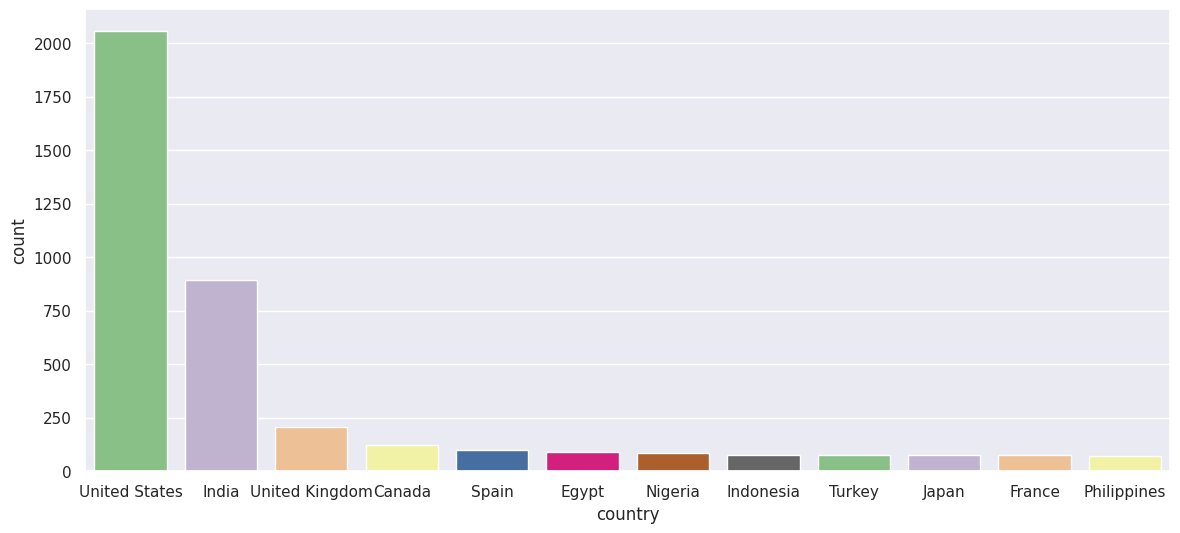

In [55]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=movie_df, palette="Accent", order=movie_df['country'].value_counts().index[0:12])

# **Countries on top for TV Show content creation**

<ipython-input-56-244b41ebc669>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='country', ylabel='count'>

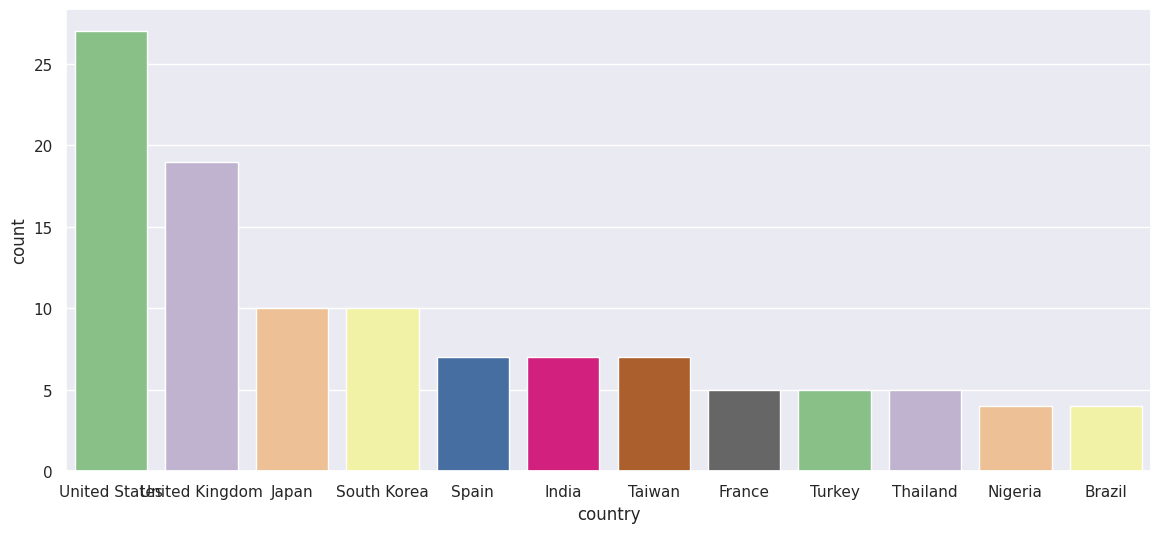

In [56]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=tv_df, palette="Accent", order=tv_df['country'].value_counts().index[0:12])

# **Most Popular Genre on Netflix**

<ipython-input-57-b0c4745eb8b2>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




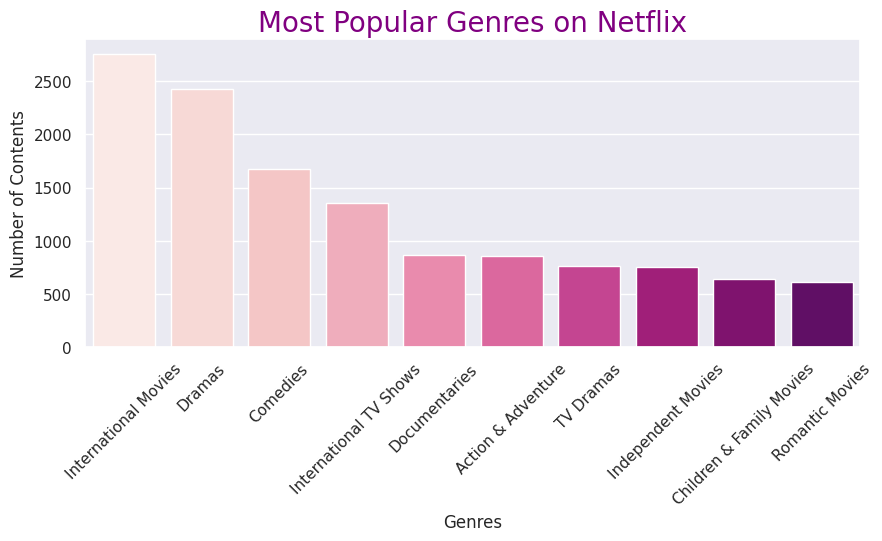

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')
# Normalize genre data: assuming genres are separated by commas
# Split the genres into a list, explode them into separate rows
netflix_data['genre_list'] = netflix_data['listed_in'].str.split(', ')
exploded_genres = netflix_data.explode('genre_list')

# Count the occurrences of each genre
genre_counts = exploded_genres['genre_list'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10,4))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='RdPu')
plt.title('Most Popular Genres on Netflix', fontsize=20, color='purple')
plt.xlabel('Genres')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

a. Genres Popular Among Different Age Groups

<ipython-input-58-a6dce521d5b0>:33: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 2000x1800 with 0 Axes>

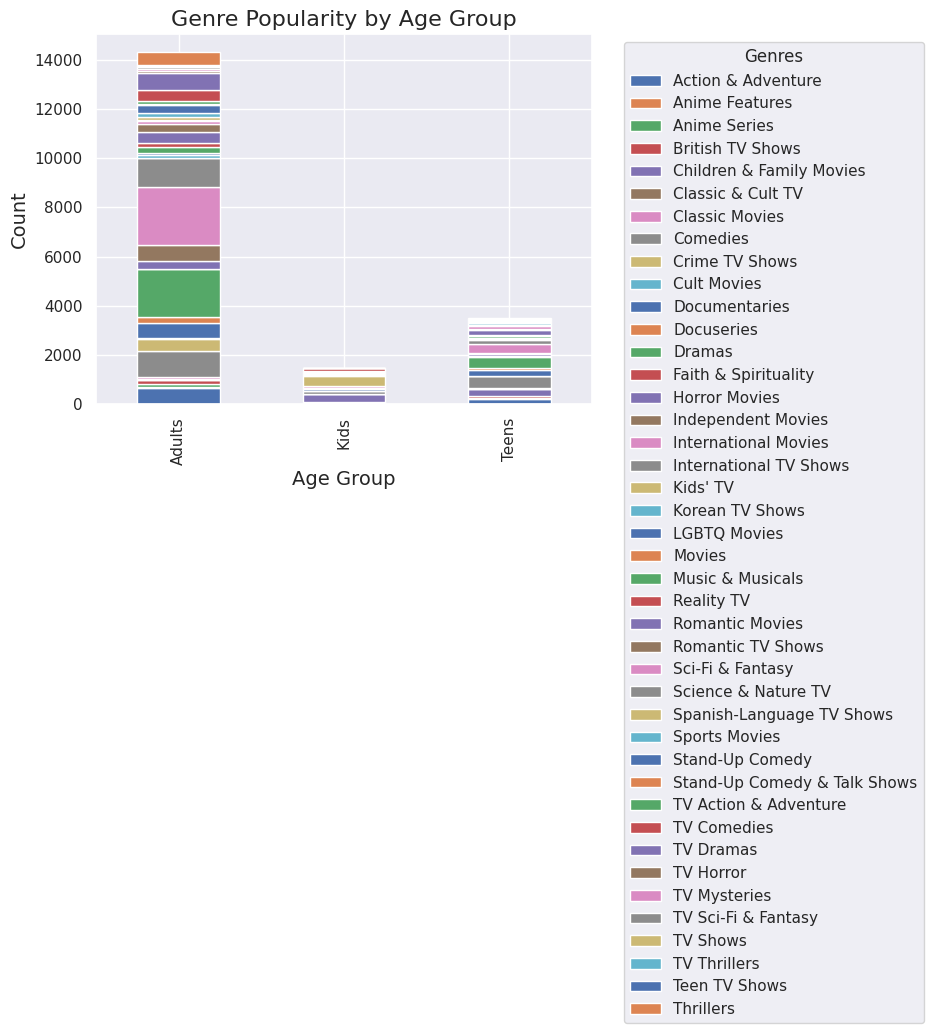

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the age groups based on ratings
age_groups = {
    'Kids': ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV'],
    'Teens': ['PG', 'TV-PG', 'PG-13'],
    'Adults': ['R', 'NC-17', 'TV-MA']
}

# Map ratings to age groups
netflix_data['age_group'] = netflix_data['rating'].apply(
    lambda x: next((k for k, v in age_groups.items() if x in v), 'Adults')
)

# Ensure that 'listed_in' column is only split if it hasn't been already
if isinstance(netflix_data['listed_in'].iloc[0], str):
    netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Explode the 'listed_in' column to count each genre separately
netflix_data_exploded = netflix_data.explode('listed_in')

# Group by age group and genre, then count occurrences
genre_popularity = netflix_data_exploded.groupby(['age_group', 'listed_in']).size().unstack().fillna(0)

# Plot genre popularity by age group
plt.figure(figsize=(20,18))
genre_popularity.plot(kind='bar', stacked=True)
plt.title('Genre Popularity by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **3. Correlation Analysis**

a.Correlation matrix

To effectively carry out a correlation analysis, we'll need to focus on the numerical data present. Currently, the only numerical column is release_year. Since we have limited numerical data, we could also encode some of the categorical variables into a numerical format and explore their relationships. For example, we could convert the type column (which categorizes content as "Movie" or "TV Show") into a binary format and calculate correlations between it, release_year, and any other encodable categorical data.

Let's encode the type column into binary format (1 for "Movie" and 0 for "TV Show") and then calculate the correlation matrix for these variables along with release_year. If you have any other specific variables you'd like to encode and analyze, please let me know! Otherwise, I'll proceed with this plan.

The correlation matrix shows the following relationships:

Release Year and Type: There's a negative correlation of approximately -0.182 between the release_year and type_encoded (where Movies are encoded as 1 and TV Shows as 0). This suggests that more recent years tend to have a slightly higher proportion of TV Shows compared to Movies, or vice versa, older years have more Movies.

In [59]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Encoding the 'type' column into a binary format: 1 for 'Movie', 0 for 'TV Show'
data['type_encoded'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Calculating the correlation matrix for 'release_year' and 'type_encoded'
correlation_matrix = data[['release_year', 'type_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)


              release_year  type_encoded
release_year       1.00000      -0.18171
type_encoded      -0.18171       1.00000


b. Correlation Heatmap

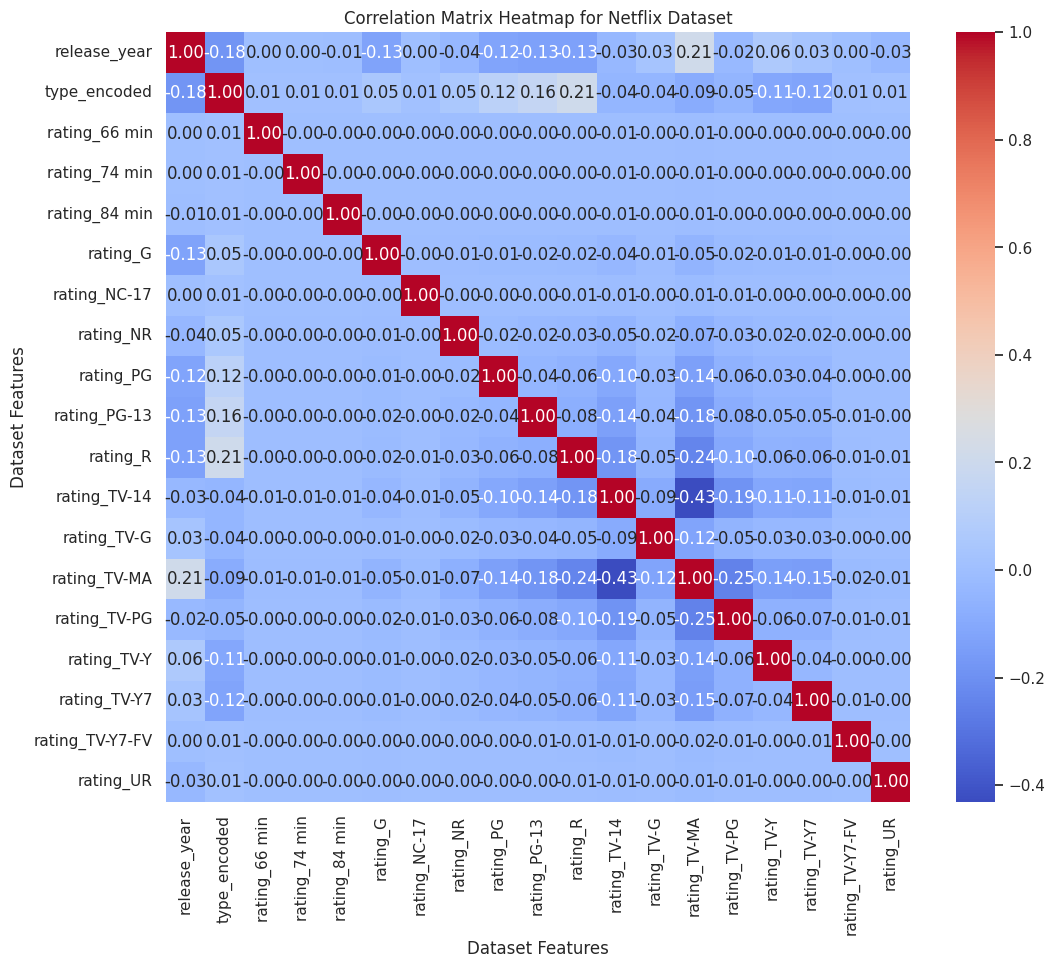

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset from a CSV file
data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Step 2: Encode the 'type' column into a binary format, where 'Movie' is 1 and 'TV Show' is 0
data['type_encoded'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Step 3: One-hot encode the 'rating' column to convert categorical rating data into a numerical format
rating_encoded = pd.get_dummies(data['rating'], prefix='rating')

# Step 4: Join the encoded rating data back to the main dataframe
data_encoded = data.join(rating_encoded)

# Step 5: Select columns for the correlation matrix, including the release year, type, and encoded ratings
correlation_columns = ['release_year', 'type_encoded'] + list(rating_encoded.columns)

# Step 6: Calculate the correlation matrix for the selected columns
correlation_matrix = data_encoded[correlation_columns].corr()

# Step 7: Create a heatmap of the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap for Netflix Dataset')
plt.xlabel('Dataset Features')
plt.ylabel('Dataset Features')
plt.show()


Correlation Analysis

**Release year and Duration**

Data Preparation

In [61]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Convert columns to appropriate data types
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Clean 'duration' column and convert to numeric
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Display the first few rows
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13      90.0   
1 2021-09-24          2021  TV-MA       2.0   
2 2021-09-24          2021  TV-MA       1.0   
3 2021-09-24

Selecting Relevant Features

In [62]:
# Select relevant features
relevant_features = ['release_year', 'duration']
correlation_data = df[relevant_features].dropna()

# Display the correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)


              release_year  duration
release_year      1.000000 -0.249182
duration         -0.249182  1.000000


Visualizing the Correlation Matrix

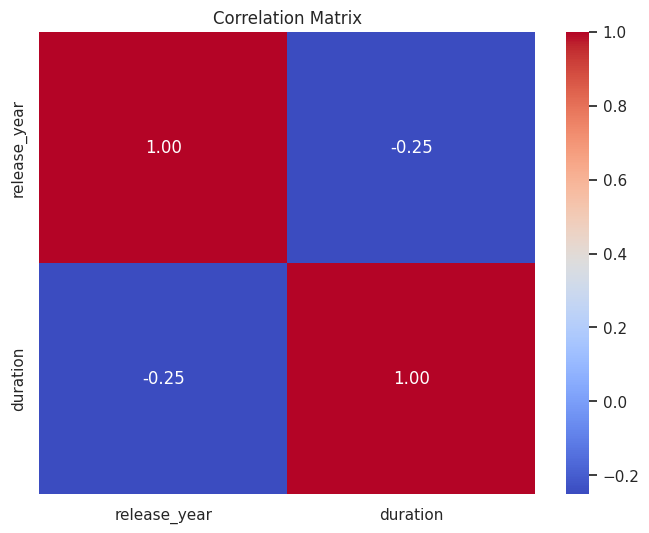

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Detailed analysis:**

correlation between the **release year** and the **duration** of titles.

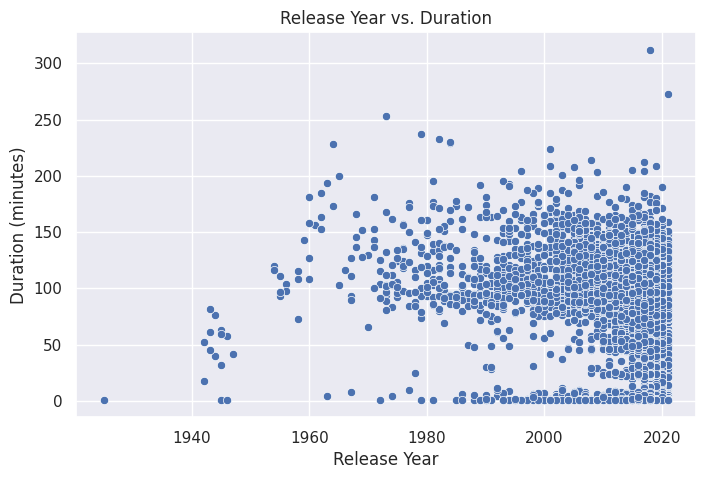

In [64]:
# Scatter plot of release year vs. duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='release_year', y='duration', data=correlation_data)
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()


how correlations change over time by segmenting the data into different time periods.

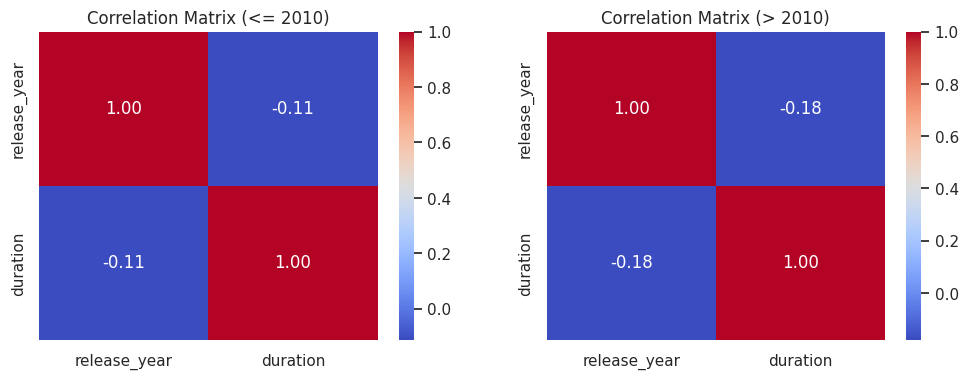

In [65]:
# Segment the data into different time periods
period_1 = df[df['release_year'] <= 2010]
period_2 = df[df['release_year'] > 2010]

# Calculate correlation matrices for each period
correlation_matrix_period_1 = period_1[relevant_features].dropna().corr()
correlation_matrix_period_2 = period_2[relevant_features].dropna().corr()

# Plot the correlation matrices for each period
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_period_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (<= 2010)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_period_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (> 2010)')

plt.show()


# **4. Trend Analysis**

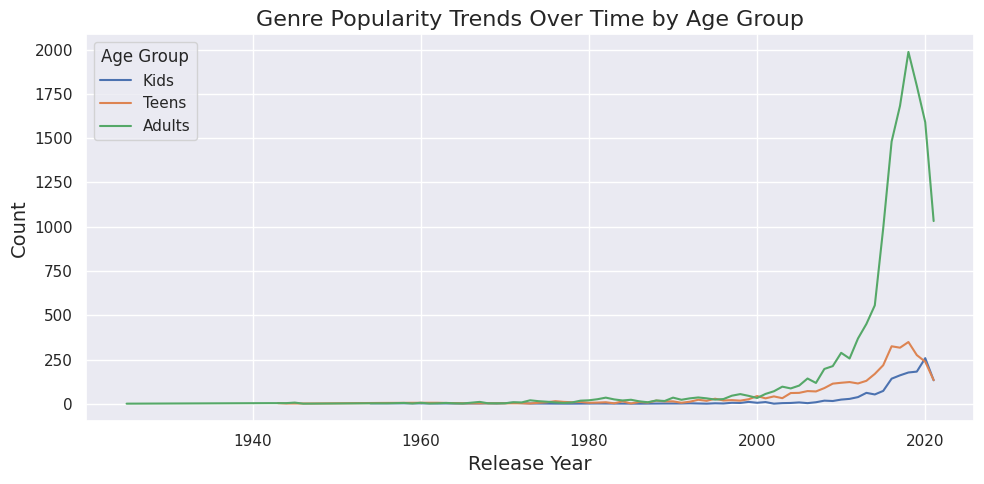

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Define the age groups based on ratings
age_groups = {
    'Kids': ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV'],
    'Teens': ['PG', 'TV-PG', 'PG-13'],
    'Adults': ['R', 'NC-17', 'TV-MA']
}

# Map ratings to age groups
netflix_data['age_group'] = netflix_data['rating'].apply(
    lambda x: next((k for k, v in age_groups.items() if x in v), 'Adults')
)

# Ensure that 'listed_in' column is only split if it hasn't been already
if isinstance(netflix_data['listed_in'].iloc[0], str):
    netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Explode the 'listed_in' column to count each genre separately
netflix_data_exploded = netflix_data.explode('listed_in')

# Trend Analysis
# Group by age group, genre, and release year, then count occurrences
trend_data = netflix_data_exploded.groupby(['release_year', 'age_group', 'listed_in']).size().unstack(fill_value=0)

# Plot trend analysis
plt.figure(figsize=(10,5))
for age_group in age_groups.keys():
    trend_data_age_group = trend_data.xs(age_group, level='age_group').sum(axis=1).fillna(0)
    trend_data_age_group.plot(kind='line', ax=plt.gca(), label=age_group)

plt.title('Genre Popularity Trends Over Time by Age Group', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



Q2. How has the quantity and type of content changed over the years?

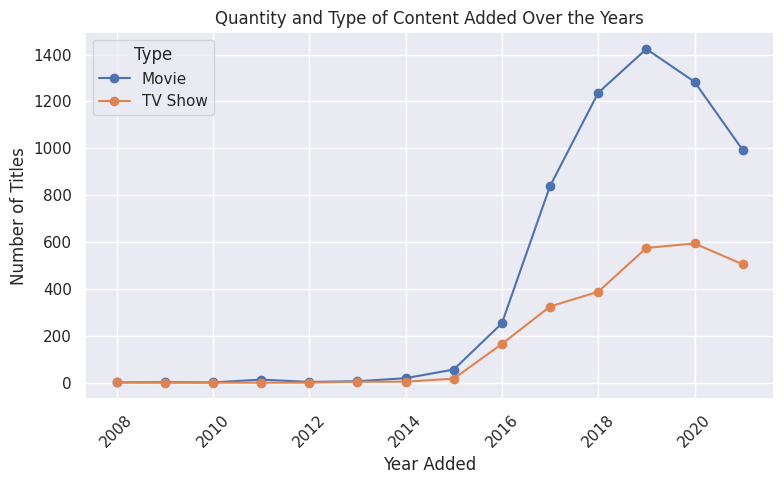

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Preprocess the data: Convert date_added to datetime and extract year
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Group by year_added and type to get the count
content_trends = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot the data as a line plot
plt.figure(figsize=(8, 5))
content_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Quantity and Type of Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q3. What is the distribution of content produced by different countries, and how has this changed over time?

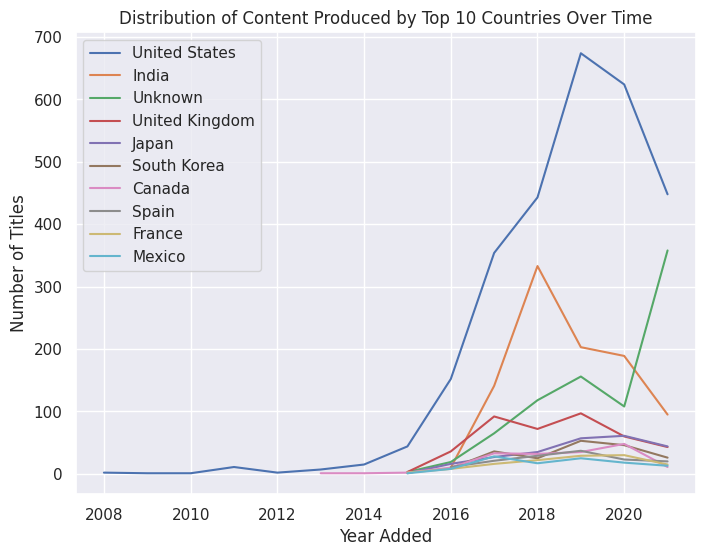

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
df = pd.read_csv(file_path)

# Fill NaN values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Convert 'date_added' to datetime, handling different formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where 'date_added' could not be parsed
df.dropna(subset=['date_added'], inplace=True)

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count the number of shows/movies produced by each country
country_distribution = df['country'].value_counts().reset_index()
country_distribution.columns = ['Country', 'Count']

# Group by year and country to see changes over time
country_year_distribution = df.groupby(['year_added', 'country']).size().reset_index(name='Count')

# Plotting the distribution of content produced by different countries
plt.figure(figsize=(8, 6))
top_countries = country_distribution.head(10)['Country']
for country in top_countries:
    subset = country_year_distribution[country_year_distribution['country'] == country]
    plt.plot(subset['year_added'], subset['Count'], label=country)

plt.title('Distribution of Content Produced by Top 10 Countries Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()


# **5. Predictive Analysis**

# **Linear Regression**

Dataset loaded. First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

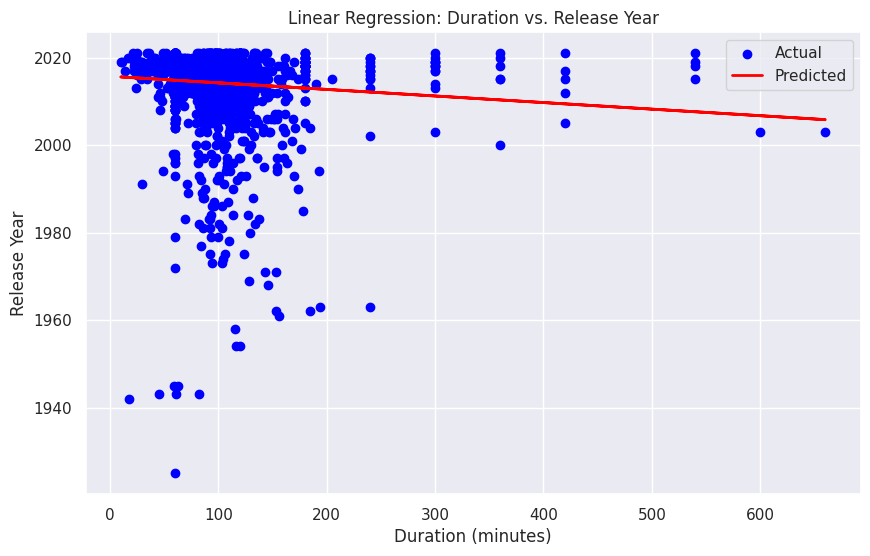

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)
print("Dataset loaded. First 5 rows:")
print(netflix_data.head(), "\n")

# Function to convert duration to numerical format
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    if 'min' in duration:
        return int(duration.split(' ')[0])
    if 'Season' in duration:
        return int(duration.split(' ')[0]) * 60  # assuming 1 season = 60 minutes for simplicity

# Apply the conversion function to the duration column
netflix_data['duration_numeric'] = netflix_data['duration'].apply(convert_duration)
print("Duration column converted to numerical format. First 5 rows with new column:")
print(netflix_data[['duration', 'duration_numeric']].head(), "\n")

# Drop rows with NaN values in the relevant columns
netflix_data = netflix_data.dropna(subset=['duration_numeric', 'release_year'])
print("Rows with NaN values dropped. Remaining rows:", len(netflix_data), "\n")

# Define the feature (X) and target (y)
X = netflix_data[['duration_numeric']].values
y = netflix_data['release_year'].values
print("Feature and target variables defined. First 5 values:")
print("X:", X[:5])
print("y:", y[:5], "\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test), "\n")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear regression model trained.")
print("Model coefficient (slope):", model.coef_[0])
print("Model intercept:", model.intercept_, "\n")

# Make predictions
y_pred = model.predict(X_test)
print("Predictions made on testing set. First 5 predictions:")
print(y_pred[:5], "\n")

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Performance metrics calculated.")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2, "\n")

# Display the chart of the parameters
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Duration vs. Release Year')
plt.xlabel('Duration (minutes)')
plt.ylabel('Release Year')
plt.legend()
plt.show()


# ***Random Forest***

Dataset loaded. First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

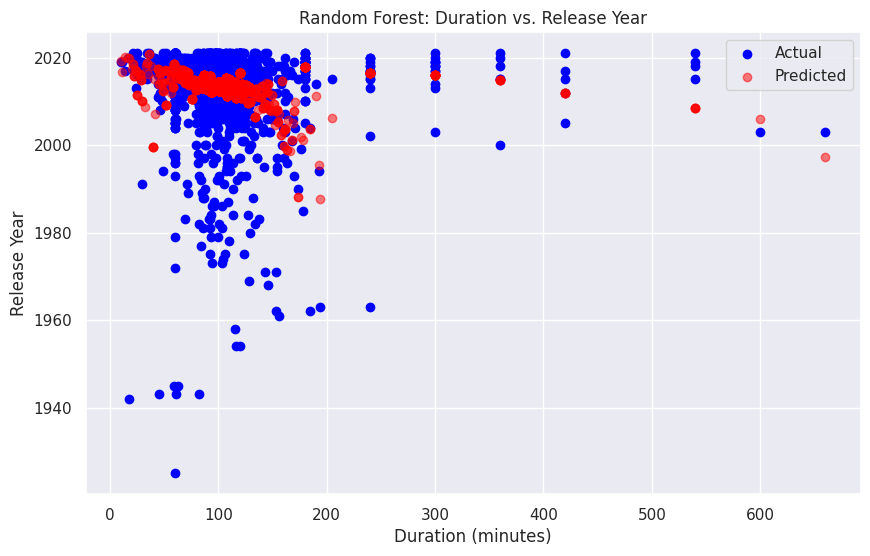

In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)
print("Dataset loaded. First 5 rows:")
print(netflix_data.head(), "\n")

# Function to convert duration to numerical format
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    if 'min' in duration:
        return int(duration.split(' ')[0])
    if 'Season' in duration:
        return int(duration.split(' ')[0]) * 60  # assuming 1 season = 60 minutes for simplicity

# Apply the conversion function to the duration column
netflix_data['duration_numeric'] = netflix_data['duration'].apply(convert_duration)
print("Duration column converted to numerical format. First 5 rows with new column:")
print(netflix_data[['duration', 'duration_numeric']].head(), "\n")

# Drop rows with NaN values in the relevant columns
netflix_data = netflix_data.dropna(subset=['duration_numeric', 'release_year'])
print("Rows with NaN values dropped. Remaining rows:", len(netflix_data), "\n")

# Define the feature (X) and target (y)
X = netflix_data[['duration_numeric']].values
y = netflix_data['release_year'].values
print("Feature and target variables defined. First 5 values:")
print("X:", X[:5])
print("y:", y[:5], "\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test), "\n")

# Create and train the random forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print("Random forest model trained.\n")

# Print model parameters
print("Model parameters:")
print("Number of Trees (n_estimators):", model.n_estimators)
print("Maximum Depth of Trees (max_depth):", model.max_depth)
print("Number of Features (max_features):", model.max_features, "\n")

# Make predictions
y_pred = model.predict(X_test)
print("Predictions made on testing set. First 5 predictions:")
print(y_pred[:5], "\n")

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance metrics calculated.")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)
print("Mean Absolute Error (MAE):", mae, "\n")

# Display the chart of the parameters
print("Displaying the chart of actual vs. predicted values:")
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Random Forest: Duration vs. Release Year')
plt.xlabel('Duration (minutes)')
plt.ylabel('Release Year')
plt.legend()
plt.show()


# **Time Series Analysis : Forcast Number of Title added**
particularly focusing on the trends over time such as the number of titles added each month or year. This can help us identify seasonal trends, growth patterns, and make future predictions.

In [71]:
# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Remove rows with NaT values in date_added
data = data.dropna(subset=['date_added'])

# Set date_added as the index
data.set_index('date_added', inplace=True)

# Resample to get the number of titles added each month
monthly_titles = data.resample('M').size()


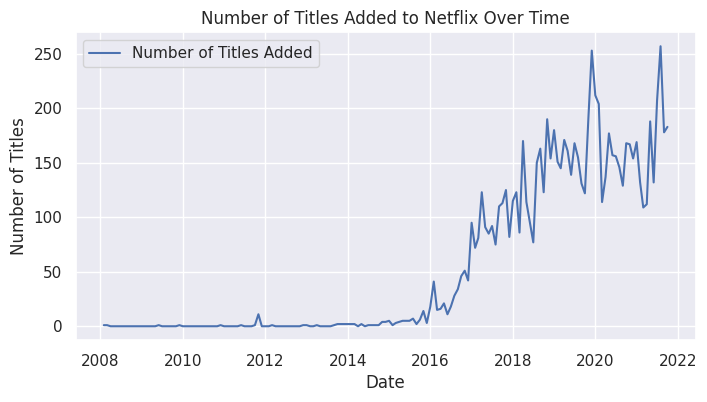

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_titles, label='Number of Titles Added')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

Observed: The actual recorded values of the time series.

Trend: Long-term movement within the data (e.g., overall increase or decrease).

Seasonal: Recurrent patterns that repeat at fixed intervals (e.g., monthly or yearly cycles).

Residual: Irregular fluctuations or noise that remain after accounting for the trend and seasonal components.

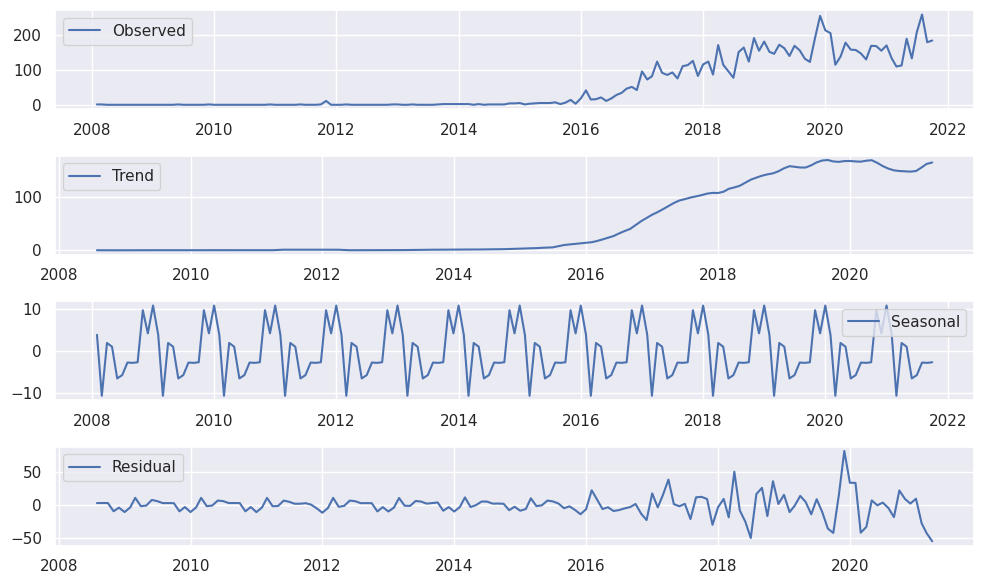

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_titles, model='additive')

# Plot the decomposed components
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


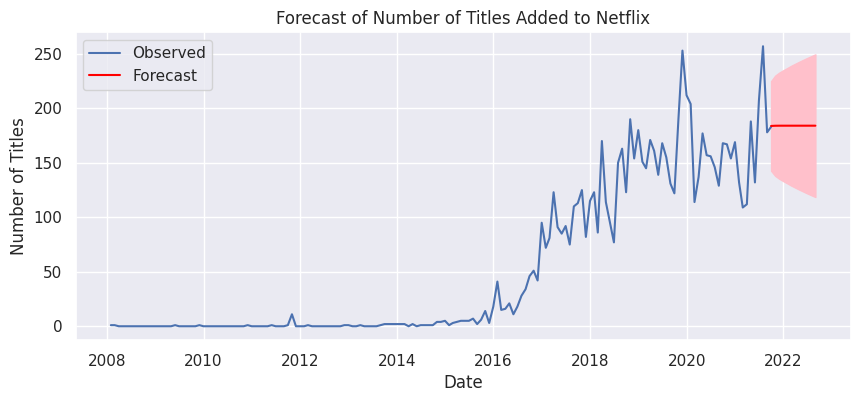

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(monthly_titles, order=(1, 1, 1))
fit = model.fit()

# Forecast future values
forecast = fit.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecast
forecast_dates = pd.date_range(start=monthly_titles.index[-1], periods=12, freq='M')

# Plot the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(monthly_titles, label='Observed')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('Forecast of Number of Titles Added to Netflix')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()
